In [44]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

import pickle
import os
%matplotlib inline

In [45]:
pwd = os.getcwd()

In [46]:
# Create a dataframe
df = pd.read_csv(pwd + '\\diabetes.csv')

In [47]:
# Explore the data 
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [48]:
# Exploring the data (no null values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [49]:
# Descriptive analysis
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [50]:
# Confirm the absence of null values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Some columns in the dataframe have values 0, the following section of code deals with features having a record of 0

Considering datatype of the features and nature of the problem, replacing 0 with mean of the particular feature is the best choice

In [51]:
# Initialize simpleimputer with strategy = 'mean'
imputer = SimpleImputer(strategy='mean')

In [52]:
# Replace zeros with NaN
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, float('nan'))

# Impute NaN with the mean
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = imputer.fit_transform(df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']])

In [53]:
# Updated dataframe
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


In [54]:
# Updated descriptive analysis
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Section of dealing with erroneous data ends


In [55]:
# Count the ocuurance of classes
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Text(0.5, 0, 'Features')

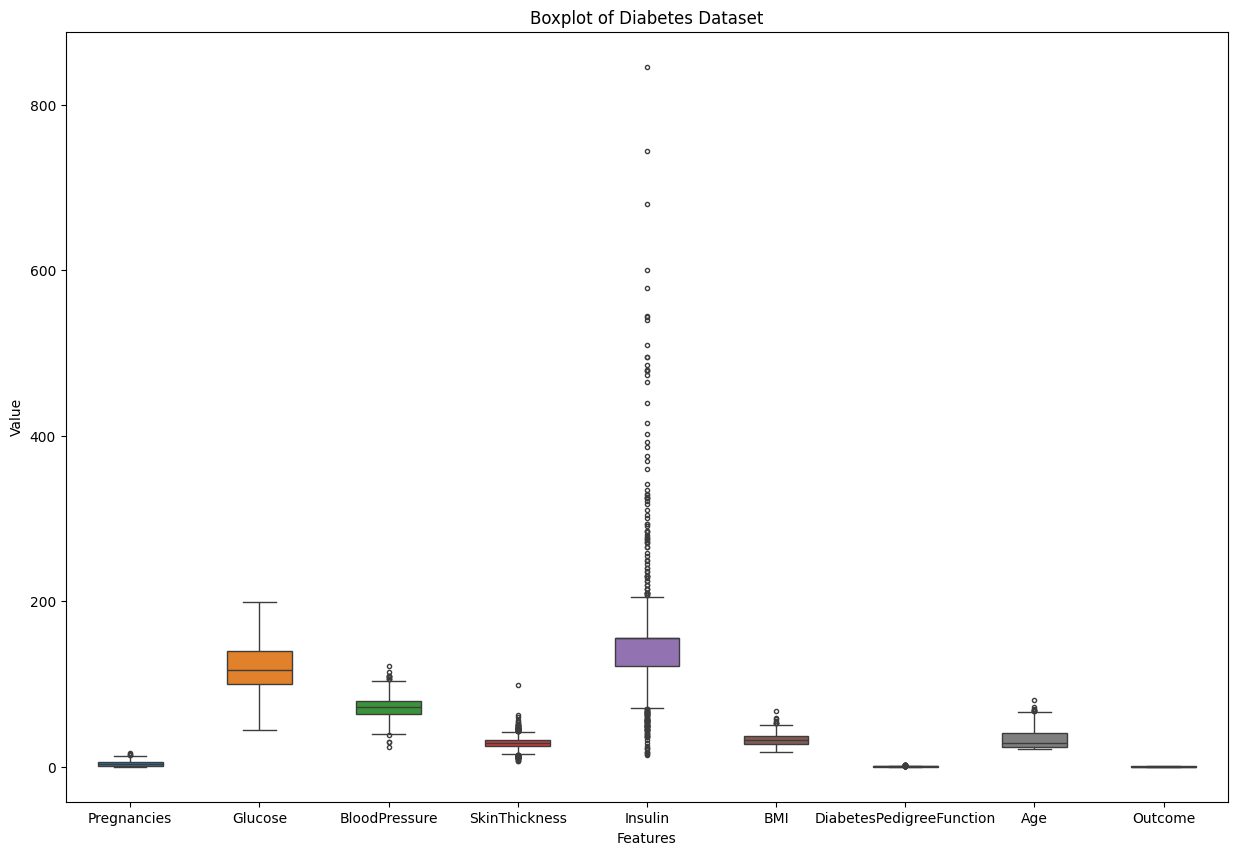

In [56]:
# Check for outliers
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width=0.5, ax=ax, fliersize=3)

# Add the title and labels
ax.set_title('Boxplot of Diabetes Dataset')
ax.set_ylabel('Value')
ax.set_xlabel('Features')

In [57]:
# Split the dataset into features and target variable
X = df.drop('Outcome', axis =1)
y = df['Outcome']

In [58]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [59]:
# Split the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [60]:
# Build a logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [61]:
# Model evaluation
y_pred = logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test,logreg_model.predict_proba(X_test)[:, 1])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(f"ROC-AUC: {roc_auc:.2f}")

Accuracy: 0.7532467532467533
Precision: 0.6666666666666666
Recall: 0.6181818181818182
F1 Score: 0.6415094339622641
ROC-AUC: 0.82


Model observation

In [62]:
# Interpretaion of model coefficients
coefficients = pd.DataFrame(logreg_model.coef_[0], index=X.columns, columns=['Coefficient'])
print(coefficients)


                          Coefficient
Pregnancies                  0.229150
Glucose                      1.095636
BloodPressure               -0.144914
SkinThickness                0.072017
Insulin                     -0.094565
BMI                          0.673588
DiabetesPedigreeFunction     0.196940
Age                          0.402747


These coefficients influence the model in predicting diabetes. If value of coefficient is positive, the chances of diabetes increases and the opposite if coefficient is negative

In [63]:
# Save the model
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(scaler, file)

The section below represents tha implementation of GridSearchCV. GridSearchCV is a hyperparameter tuning process that helps find the best hyperparameter combination that yeilds best results

In [64]:
# Define the parameter grid to search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l2'],
              'solver': ['lbfgs']}

In [65]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(logreg_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [66]:
# Get the best parameters
best_params = grid_search.best_params_

In [67]:
# Build the model with the best parameters
best_logreg_model = LogisticRegression(**best_params)
best_logreg_model.fit(X_train, y_train)

LogisticRegression(C=0.1)

Observation: Increase in accuracy metrics due to combination of best hyperparameters, achieved via GridSearchCV

In [68]:
# Model evaluation
y_pred = best_logreg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.7662337662337663
Precision: 0.6938775510204082
Recall: 0.6181818181818182
F1 Score: 0.6538461538461539
ROC AUC Score: 0.7333333333333334


In [69]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[84 15]
 [21 34]]


In [70]:
# Interpret the model coefficients for the improved model
coefficients_best = pd.DataFrame({'Feature': range(X_train.shape[1]), 'Coefficient': best_logreg_model.coef_[0]})
coefficients_best = coefficients_best.sort_values(by='Coefficient', ascending=False)
print(coefficients_best)

   Feature  Coefficient
1        1     0.954633
5        5     0.572231
7        7     0.359401
0        0     0.215134
6        6     0.181145
3        3     0.098573
4        4    -0.037067
2        2    -0.089950
